# IMPORT DATA

In [1]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

In [2]:
import glob
base_dir = "D:/Vegetables"
filename=glob.glob(base_dir+"/*/*.jpg")


# IMAGE AUGMENTATION

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
                    rescale=1.0/255,
                    rotation_range=25,
                    width_shift_range=0.2,
                    height_shift_range=0.2,
                    shear_range=0.2,
                    zoom_range=0.2,
                    horizontal_flip=True,
                    vertical_flip= True,
                    fill_mode='nearest',
                    validation_split=0.2
                    )

train_generator = train_datagen.flow_from_directory(
                      base_dir, 
                      target_size= (150, 150),  
                      batch_size= 32,
                      shuffle = True,
                      subset = 'training',
                      class_mode= 'categorical' 
                      )


validation_generator = train_datagen.flow_from_directory(
                          base_dir, 
                          target_size= (150, 150),
                          batch_size= 32, 
                          shuffle = True,
                          subset = 'validation',
                          class_mode= 'categorical'
                          )

Found 3842 images belonging to 8 classes.
Found 954 images belonging to 8 classes.


# MODEL 1

In [4]:
IMG_SHAPE = (150, 150,3)
# Membuat model dasar (base model) dari pre-trained model VGG-16Net
base_model = tf.keras.applications.VGG16(input_shape=IMG_SHAPE,
                                              include_top=False, 
                                              weights='imagenet')


In [5]:
base_model.traianable=False

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, Activation, Flatten, MaxPool2D, BatchNormalization

model = tf.keras.models.Sequential([
    base_model,
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dense(4096, activation='relu'),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Dense(8, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                524352    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 512)               33280     
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              5

In [7]:
from tensorflow.keras.optimizers import Adam
model.compile(loss = 'categorical_crossentropy',optimizer = Adam(learning_rate = 1e-5), metrics= ['accuracy'])

In [8]:
class myCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('accuracy') > 0.99 and logs.get('val_accuracy') > 0.99):
           print("\nakurasi lebih besar dari 96%. maka training berhenti!") 
           self.model.stop_training = True 
 
callbacks = myCallback()

In [9]:
history = model.fit(train_generator,epochs=50, steps_per_epoch=len(train_generator),
          validation_data=validation_generator,validation_steps=len(validation_generator),
          verbose=1,callbacks = [callbacks])

Epoch 1/50
 33/121 [=======>......................] - ETA: 1:29 - loss: 2.0746 - accuracy: 0.1411

C:\Users\Matematika\anaconda3\lib\site-packages\PIL\Image.py:979: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


121/121 [==============================] - 183s 1s/step - loss: 1.7123 - accuracy: 0.3410 - val_loss: 0.8708 - val_accuracy: 0.7107
Epoch 2/50
121/121 [==============================] - 41s 340ms/step - loss: 0.7343 - accuracy: 0.7303 - val_loss: 0.4695 - val_accuracy: 0.8438
Epoch 3/50
121/121 [==============================] - 41s 340ms/step - loss: 0.5117 - accuracy: 0.8136 - val_loss: 0.3963 - val_accuracy: 0.8774
Epoch 4/50
121/121 [==============================] - 42s 344ms/step - loss: 0.3922 - accuracy: 0.8574 - val_loss: 0.3555 - val_accuracy: 0.8878
Epoch 5/50
121/121 [==============================] - 42s 344ms/step - loss: 0.3701 - accuracy: 0.8727 - val_loss: 0.3738 - val_accuracy: 0.8941
Epoch 6/50
121/121 [==============================] - 41s 342ms/step - loss: 0.3041 - accuracy: 0.8930 - val_loss: 0.2898 - val_accuracy: 0.9046
Epoch 7/50
121/121 [==============================] - 42s 343ms/step - loss: 0.2896 - accuracy: 0.9001 - val_loss: 0.2847 - val_accuracy: 0.917

# VISUALISASI AKURASI DAN LOSS

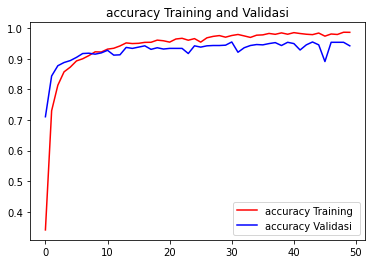

<Figure size 432x288 with 0 Axes>

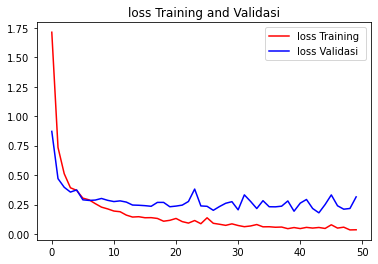

<Figure size 432x288 with 0 Axes>

In [10]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='accuracy Training ')
plt.plot(epochs, val_acc, 'b', label='accuracy Validasi')
plt.title('accuracy Training and Validasi')
plt.legend(loc=0)
plt.figure()
plt.show()

plt.plot(epochs, loss, 'r', label='loss Training ')
plt.plot(epochs, val_loss, 'b', label='loss Validasi')
plt.title('loss Training and Validasi')
plt.legend(loc=0)
plt.figure()
plt.show()

# PREDIKSI MODEL

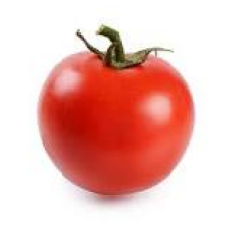

[[0. 0. 0. 1. 0. 0. 0. 0.]]
FreshTomato
20/30 [===================>..........] - ETA: 2s - loss: 0.3334 - accuracy: 0.9516

C:\Users\Matematika\anaconda3\lib\site-packages\PIL\Image.py:979: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


30/30 [==============================] - 8s 256ms/step - loss: 0.3326 - accuracy: 0.9465


In [11]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Menentukan path gambar
path = "C:/Users/Matematika/Downloads/freshtomato.jpg" # Ganti dengan path gambar Anda

# Memuat gambar
img = image.load_img(path, target_size=(150, 150))

# Menampilkan gambar
plt.imshow(img)
plt.axis('off')
plt.show()

# Mengubah gambar menjadi array numpy
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])

# Melakukan prediksi menggunakan model
classes = model.predict(images, batch_size=32)
print(classes)

# Mencetak hasil prediksi
if classes[0, 0] == 1:
    print('FreshCarrot')
elif classes[0, 1] == 1:
    print('FreshCucumber')
elif classes[0, 2] == 1:
    print('FreshPotato')
elif classes[0, 3] == 1:
    print('FreshTomato')
elif classes[0, 4] == 1:
    print('RottenCarrot')
elif classes[0, 5] == 1:
    print('RottenCucumber')
elif classes[0, 6] == 1:
    print('RottenPotato')
elif classes[0, 7] == 1:
    print('RottenTomato')
else:
    print('Tidak diketahui')
loss=model.evaluate(validation_generator,steps=len(validation_generator))

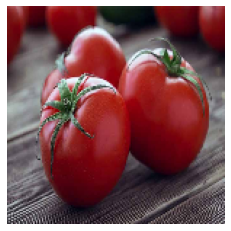

[[0. 0. 0. 1. 0. 0. 0. 0.]]
FreshTomato
30/30 [==============================] - 8s 258ms/step - loss: 0.3511 - accuracy: 0.9340


In [12]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Menentukan path gambar
path = "C:/Users/Matematika/Downloads/fresttomato2.jpeg" # Ganti dengan path gambar Anda

# Memuat gambar
img = image.load_img(path, target_size=(150, 150))

# Menampilkan gambar
plt.imshow(img)
plt.axis('off')
plt.show()

# Mengubah gambar menjadi array numpy
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])

# Melakukan prediksi menggunakan model
classes = model.predict(images, batch_size=32)
print(classes)

# Mencetak hasil prediksi
if classes[0, 0] == 1:
    print('FreshCarrot')
elif classes[0, 1] == 1:
    print('FreshCucumber')
elif classes[0, 2] == 1:
    print('FreshPotato')
elif classes[0, 3] == 1:
    print('FreshTomato')
elif classes[0, 4] == 1:
    print('RottenCarrot')
elif classes[0, 5] == 1:
    print('RottenCucumber')
elif classes[0, 6] == 1:
    print('RottenPotato')
elif classes[0, 7] == 1:
    print('RottenTomato')
else:
    print('Tidak diketahui')
loss=model.evaluate(validation_generator,steps=len(validation_generator))

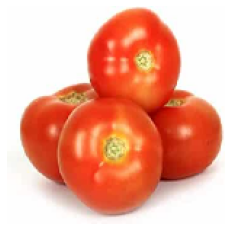

[[0. 0. 0. 1. 0. 0. 0. 0.]]
FreshTomato
30/30 [==============================] - 8s 255ms/step - loss: 0.3523 - accuracy: 0.9340


In [13]:
 import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Menentukan path gambar
path = "C:/Users/Matematika/Downloads/fresh tomato.jpg" # Ganti dengan path gambar Anda

# Memuat gambar
img = image.load_img(path, target_size=(150, 150))

# Menampilkan gambar
plt.imshow(img)
plt.axis('off')
plt.show()

# Mengubah gambar menjadi array numpy
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])

# Melakukan prediksi menggunakan model
classes = model.predict(images, batch_size=32)
print(classes)

# Mencetak hasil prediksi
if classes[0, 0] == 1:
    print('FreshCarrot')
elif classes[0, 1] == 1:
    print('FreshCucumber')
elif classes[0, 2] == 1:
    print('FreshPotato')
elif classes[0, 3] == 1:
    print('FreshTomato')
elif classes[0, 4] == 1:
    print('RottenCarrot')
elif classes[0, 5] == 1:
    print('RottenCucumber')
elif classes[0, 6] == 1:
    print('RottenPotato')
elif classes[0, 7] == 1:
    print('RottenTomato')
else:
    print('Tidak diketahui')
loss=model.evaluate(validation_generator,steps=len(validation_generator))

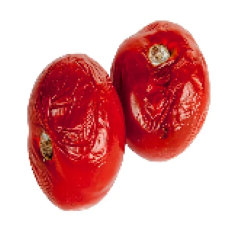

[[0. 0. 0. 0. 0. 0. 0. 1.]]
RottenTomato
30/30 [==============================] - 8s 257ms/step - loss: 0.2935 - accuracy: 0.9423


In [14]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Menentukan path gambar
path = "C:/Users/Matematika/Downloads/rotten tomato1.jpg" # Ganti dengan path gambar Anda

# Memuat gambar
img = image.load_img(path, target_size=(150, 150))

# Menampilkan gambar
plt.imshow(img)
plt.axis('off')
plt.show()

# Mengubah gambar menjadi array numpy
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])

# Melakukan prediksi menggunakan model
classes = model.predict(images, batch_size=32)
print(classes)

# Mencetak hasil prediksi
if classes[0, 0] == 1:
    print('FreshCarrot')
elif classes[0, 1] == 1:
    print('FreshCucumber')
elif classes[0, 2] == 1:
    print('FreshPotato')
elif classes[0, 3] == 1:
    print('FreshTomato')
elif classes[0, 4] == 1:
    print('RottenCarrot')
elif classes[0, 5] == 1:
    print('RottenCucumber')
elif classes[0, 6] == 1:
    print('RottenPotato')
elif classes[0, 7] == 1:
    print('RottenTomato')
else:
    print('Tidak diketahui')
loss=model.evaluate(validation_generator,steps=len(validation_generator))

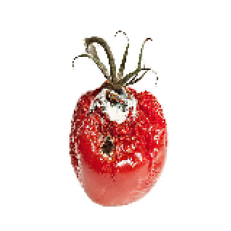

[[0. 0. 0. 0. 0. 0. 0. 1.]]
RottenTomato
30/30 [==============================] - 8s 255ms/step - loss: 0.2919 - accuracy: 0.9465


In [15]:
 import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Menentukan path gambar
path = "C:/Users/Matematika/Downloads/rotten tomato2.jpg" # Ganti dengan path gambar Anda

# Memuat gambar
img = image.load_img(path, target_size=(150, 150))

# Menampilkan gambar
plt.imshow(img)
plt.axis('off')
plt.show()

# Mengubah gambar menjadi array numpy
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])

# Melakukan prediksi menggunakan model
classes = model.predict(images, batch_size=32)
print(classes)

# Mencetak hasil prediksi
if classes[0, 0] == 1:
    print('FreshCarrot')
elif classes[0, 1] == 1:
    print('FreshCucumber')
elif classes[0, 2] == 1:
    print('FreshPotato')
elif classes[0, 3] == 1:
    print('FreshTomato')
elif classes[0, 4] == 1:
    print('RottenCarrot')
elif classes[0, 5] == 1:
    print('RottenCucumber')
elif classes[0, 6] == 1:
    print('RottenPotato')
elif classes[0, 7] == 1:
    print('RottenTomato')
else:
    print('Tidak diketahui')
loss=model.evaluate(validation_generator,steps=len(validation_generator))

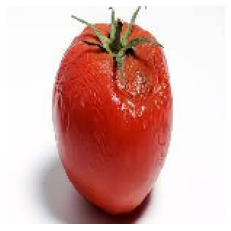

[[0. 0. 0. 0. 0. 0. 0. 1.]]
RottenTomato
30/30 [==============================] - 8s 254ms/step - loss: 0.3034 - accuracy: 0.9444


In [16]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Menentukan path gambar
path = "C:/Users/Matematika/Downloads/rottentomato.jpg"  # Ganti dengan path gambar Anda

# Memuat gambar
img = image.load_img(path, target_size=(150, 150))

# Menampilkan gambar
plt.imshow(img)
plt.axis('off')
plt.show()

# Mengubah gambar menjadi array numpy
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])

# Melakukan prediksi menggunakan model
classes = model.predict(images, batch_size=32)
print(classes)

# Mencetak hasil prediksi
if classes[0, 0] == 1:
    print('FreshCarrot')
elif classes[0, 1] == 1:
    print('FreshCucumber')
elif classes[0, 2] == 1:
    print('FreshPotato')
elif classes[0, 3] == 1:
    print('FreshTomato')
elif classes[0, 4] == 1:
    print('RottenCarrot')
elif classes[0, 5] == 1:
    print('RottenCucumber')
elif classes[0, 6] == 1:
    print('RottenPotato')
elif classes[0, 7] == 1:
    print('RottenTomato')
else:
    print('Tidak diketahui')
loss=model.evaluate(validation_generator,steps=len(validation_generator))

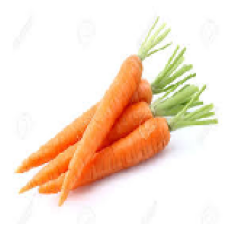

[[1. 0. 0. 0. 0. 0. 0. 0.]]
FreshCarrot
30/30 [==============================] - 8s 258ms/step - loss: 0.3141 - accuracy: 0.9486


In [17]:
 import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Menentukan path gambar
path = "C:/Users/Matematika/Downloads/freshcarrot1.jfif" # Ganti dengan path gambar Anda

# Memuat gambar
img = image.load_img(path, target_size=(150, 150))

# Menampilkan gambar
plt.imshow(img)
plt.axis('off')
plt.show()

# Mengubah gambar menjadi array numpy
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])

# Melakukan prediksi menggunakan model
classes = model.predict(images, batch_size=32)
print(classes)

# Mencetak hasil prediksi
if classes[0, 0] == 1:
    print('FreshCarrot')
elif classes[0, 1] == 1:
    print('FreshCucumber')
elif classes[0, 2] == 1:
    print('FreshPotato')
elif classes[0, 3] == 1:
    print('FreshTomato')
elif classes[0, 4] == 1:
    print('RottenCarrot')
elif classes[0, 5] == 1:
    print('RottenCucumber')
elif classes[0, 6] == 1:
    print('RottenPotato')
elif classes[0, 7] == 1:
    print('RottenTomato')
else:
    print('Tidak diketahui')
loss=model.evaluate(validation_generator,steps=len(validation_generator))

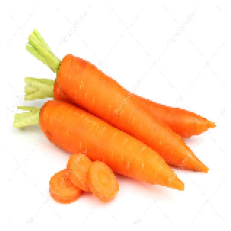

[[1. 0. 0. 0. 0. 0. 0. 0.]]
FreshCarrot
30/30 [==============================] - 8s 257ms/step - loss: 0.3260 - accuracy: 0.9423


In [18]:
 import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Menentukan path gambar
path = "C:/Users/Matematika/Downloads/freshcarrot2.jpg" # Ganti dengan path gambar Anda

# Memuat gambar
img = image.load_img(path, target_size=(150, 150))

# Menampilkan gambar
plt.imshow(img)
plt.axis('off')
plt.show()

# Mengubah gambar menjadi array numpy
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])

# Melakukan prediksi menggunakan model
classes = model.predict(images, batch_size=32)
print(classes)

# Mencetak hasil prediksi
if classes[0, 0] == 1:
    print('FreshCarrot')
elif classes[0, 1] == 1:
    print('FreshCucumber')
elif classes[0, 2] == 1:
    print('FreshPotato')
elif classes[0, 3] == 1:
    print('FreshTomato')
elif classes[0, 4] == 1:
    print('RottenCarrot')
elif classes[0, 5] == 1:
    print('RottenCucumber')
elif classes[0, 6] == 1:
    print('RottenPotato')
elif classes[0, 7] == 1:
    print('RottenTomato')
else:
    print('Tidak diketahui')
loss=model.evaluate(validation_generator,steps=len(validation_generator))

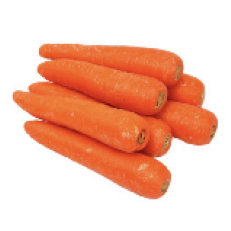

[[1. 0. 0. 0. 0. 0. 0. 0.]]
FreshCarrot
30/30 [==============================] - 8s 254ms/step - loss: 0.2817 - accuracy: 0.9486


In [19]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Menentukan path gambar
path = "C:/Users/Matematika/Downloads/freshcarrot.jpg" # Ganti dengan path gambar Anda

# Memuat gambar
img = image.load_img(path, target_size=(150, 150))

# Menampilkan gambar
plt.imshow(img)
plt.axis('off')
plt.show()

# Mengubah gambar menjadi array numpy
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])

# Melakukan prediksi menggunakan model
classes = model.predict(images, batch_size=32)
print(classes)

# Mencetak hasil prediksi
if classes[0, 0] == 1:
    print('FreshCarrot')
elif classes[0, 1] == 1:
    print('FreshCucumber')
elif classes[0, 2] == 1:
    print('FreshPotato')
elif classes[0, 3] == 1:
    print('FreshTomato')
elif classes[0, 4] == 1:
    print('RottenCarrot')
elif classes[0, 5] == 1:
    print('RottenCucumber')
elif classes[0, 6] == 1:
    print('RottenPotato')
elif classes[0, 7] == 1:
    print('RottenTomato')
else:
    print('Tidak diketahui')
loss=model.evaluate(validation_generator,steps=len(validation_generator))

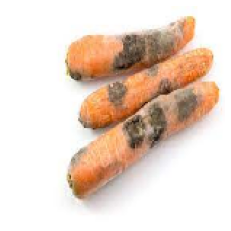

[[0. 0. 0. 0. 1. 0. 0. 0.]]
RottenCarrot
30/30 [==============================] - 8s 255ms/step - loss: 0.3593 - accuracy: 0.9361


In [20]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Menentukan path gambar
path = "C:/Users/Matematika/Downloads/rottencarrot.jpg" # Ganti dengan path gambar Anda

# Memuat gambar
img = image.load_img(path, target_size=(150, 150))

# Menampilkan gambar
plt.imshow(img)
plt.axis('off')
plt.show()

# Mengubah gambar menjadi array numpy
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])

# Melakukan prediksi menggunakan model
classes = model.predict(images, batch_size=32)
print(classes)

# Mencetak hasil prediksi
if classes[0, 0] == 1:
    print('FreshCarrot')
elif classes[0, 1] == 1:
    print('FreshCucumber')
elif classes[0, 2] == 1:
    print('FreshPotato')
elif classes[0, 3] == 1:
    print('FreshTomato')
elif classes[0, 4] == 1:
    print('RottenCarrot')
elif classes[0, 5] == 1:
    print('RottenCucumber')
elif classes[0, 6] == 1:
    print('RottenPotato')
elif classes[0, 7] == 1:
    print('RottenTomato')
else:
    print('Tidak diketahui')
loss=model.evaluate(validation_generator,steps=len(validation_generator))

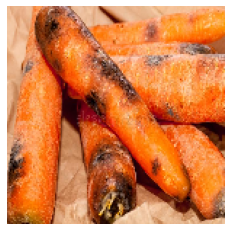

[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00
  0.0000000e+00 0.0000000e+00 3.9685594e-14]]
RottenCarrot
30/30 [==============================] - 8s 254ms/step - loss: 0.3429 - accuracy: 0.9423


In [21]:
 import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Menentukan path gambar
path = "C:/Users/Matematika/Downloads/rottencarrot3.jpg" # Ganti dengan path gambar Anda

# Memuat gambar
img = image.load_img(path, target_size=(150, 150))

# Menampilkan gambar
plt.imshow(img)
plt.axis('off')
plt.show()

# Mengubah gambar menjadi array numpy
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])

# Melakukan prediksi menggunakan model
classes = model.predict(images, batch_size=32)
print(classes)

# Mencetak hasil prediksi
if classes[0, 0] == 1:
    print('FreshCarrot')
elif classes[0, 1] == 1:
    print('FreshCucumber')
elif classes[0, 2] == 1:
    print('FreshPotato')
elif classes[0, 3] == 1:
    print('FreshTomato')
elif classes[0, 4] == 1:
    print('RottenCarrot')
elif classes[0, 5] == 1:
    print('RottenCucumber')
elif classes[0, 6] == 1:
    print('RottenPotato')
elif classes[0, 7] == 1:
    print('RottenTomato')
else:
    print('Tidak diketahui')
loss=model.evaluate(validation_generator,steps=len(validation_generator))

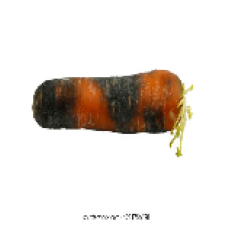

[[0. 0. 0. 0. 1. 0. 0. 0.]]
RottenCarrot
30/30 [==============================] - 8s 251ms/step - loss: 0.3138 - accuracy: 0.9434


In [22]:
 import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Menentukan path gambar
path ="C:/Users/Matematika/Downloads/rottencarrot2.webp" # Ganti dengan path gambar Anda

# Memuat gambar
img = image.load_img(path, target_size=(150, 150))

# Menampilkan gambar
plt.imshow(img)
plt.axis('off')
plt.show()

# Mengubah gambar menjadi array numpy
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])

# Melakukan prediksi menggunakan model
classes = model.predict(images, batch_size=32)
print(classes)

# Mencetak hasil prediksi
if classes[0, 0] == 1:
    print('FreshCarrot')
elif classes[0, 1] == 1:
    print('FreshCucumber')
elif classes[0, 2] == 1:
    print('FreshPotato')
elif classes[0, 3] == 1:
    print('FreshTomato')
elif classes[0, 4] == 1:
    print('RottenCarrot')
elif classes[0, 5] == 1:
    print('RottenCucumber')
elif classes[0, 6] == 1:
    print('RottenPotato')
elif classes[0, 7] == 1:
    print('RottenTomato')
else:
    print('Tidak diketahui')
loss=model.evaluate(validation_generator,steps=len(validation_generator))

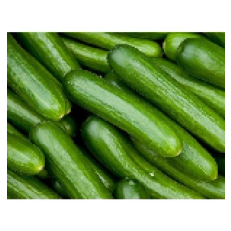

[[0. 1. 0. 0. 0. 0. 0. 0.]]
FreshCucumber
30/30 [==============================] - 8s 256ms/step - loss: 0.3095 - accuracy: 0.9413


In [23]:
 import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Menentukan path gambar
path = "C:/Users/Matematika/Downloads/freshcucumber2.jpg" # Ganti dengan path gambar Anda

# Memuat gambar
img = image.load_img(path, target_size=(150, 150))

# Menampilkan gambar
plt.imshow(img)
plt.axis('off')
plt.show()

# Mengubah gambar menjadi array numpy
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])

# Melakukan prediksi menggunakan model
classes = model.predict(images, batch_size=32)
print(classes)

# Mencetak hasil prediksi
if classes[0, 0] == 1:
    print('FreshCarrot')
elif classes[0, 1] == 1:
    print('FreshCucumber')
elif classes[0, 2] == 1:
    print('FreshPotato')
elif classes[0, 3] == 1:
    print('FreshTomato')
elif classes[0, 4] == 1:
    print('RottenCarrot')
elif classes[0, 5] == 1:
    print('RottenCucumber')
elif classes[0, 6] == 1:
    print('RottenPotato')
elif classes[0, 7] == 1:
    print('RottenTomato')
else:
    print('Tidak diketahui')
loss=model.evaluate(validation_generator,steps=len(validation_generator))

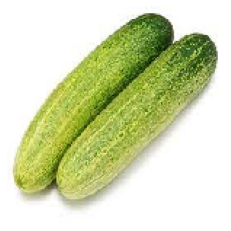

[[0.000000e+00 1.000000e+00 0.000000e+00 0.000000e+00 0.000000e+00
  5.000247e-34 0.000000e+00 0.000000e+00]]
FreshCucumber
30/30 [==============================] - 8s 256ms/step - loss: 0.3213 - accuracy: 0.9413


In [24]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Menentukan path gambar
path = "C:/Users/Matematika/Downloads/freshcucumber.jpg" # Ganti dengan path gambar Anda

# Memuat gambar
img = image.load_img(path, target_size=(150, 150))

# Menampilkan gambar
plt.imshow(img)
plt.axis('off')
plt.show()

# Mengubah gambar menjadi array numpy
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])

# Melakukan prediksi menggunakan model
classes =model.predict(images, batch_size=32)
print(classes)

# Mencetak hasil prediksi
if classes[0, 0] == 1:
    print('FreshCarrot')
elif classes[0, 1] == 1:
    print('FreshCucumber')
elif classes[0, 2] == 1:
    print('FreshPotato')
elif classes[0, 3] == 1:
    print('FreshTomato')
elif classes[0, 4] == 1:
    print('RottenCarrot')
elif classes[0, 5] == 1:
    print('RottenCucumber')
elif classes[0, 6] == 1:
    print('RottenPotato')
elif classes[0, 7] == 1:
    print('RottenTomato')
else:
    print('Tidak diketahui')
loss=model.evaluate(validation_generator,steps=len(validation_generator))

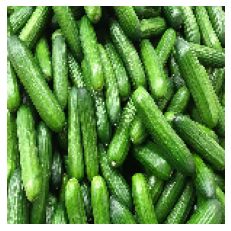

[[0. 1. 0. 0. 0. 0. 0. 0.]]
FreshCucumber
30/30 [==============================] - 8s 256ms/step - loss: 0.3210 - accuracy: 0.9423


In [25]:
 import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Menentukan path gambar
path = "C:/Users/Matematika/Downloads/freshcucumber1.jpg" # Ganti dengan path gambar Anda

# Memuat gambar
img = image.load_img(path, target_size=(150, 150))

# Menampilkan gambar
plt.imshow(img)
plt.axis('off')
plt.show()

# Mengubah gambar menjadi array numpy
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])

# Melakukan prediksi menggunakan model
classes = model.predict(images, batch_size=32)
print(classes)

# Mencetak hasil prediksi
if classes[0, 0] == 1:
    print('FreshCarrot')
elif classes[0, 1] == 1:
    print('FreshCucumber')
elif classes[0, 2] == 1:
    print('FreshPotato')
elif classes[0, 3] == 1:
    print('FreshTomato')
elif classes[0, 4] == 1:
    print('RottenCarrot')
elif classes[0, 5] == 1:
    print('RottenCucumber')
elif classes[0, 6] == 1:
    print('RottenPotato')
elif classes[0, 7] == 1:
    print('RottenTomato')
else:
    print('Tidak diketahui')
loss=model.evaluate(validation_generator,steps=len(validation_generator))

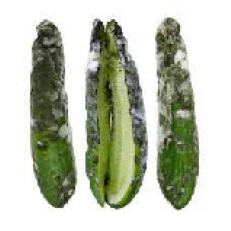

[[0. 0. 0. 0. 0. 1. 0. 0.]]
RottenCucumber
30/30 [==============================] - 8s 259ms/step - loss: 0.3397 - accuracy: 0.9382


In [26]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Menentukan path gambar
path = "C:/Users/Matematika/Downloads/rottencucumber3.jfif" # Ganti dengan path gambar Anda

# Memuat gambar
img = image.load_img(path, target_size=(150, 150))

# Menampilkan gambar
plt.imshow(img)
plt.axis('off')
plt.show()

# Mengubah gambar menjadi array numpy
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])

# Melakukan prediksi menggunakan model
classes = model.predict(images, batch_size=32)
print(classes)

# Mencetak hasil prediksi
if classes[0, 0] == 1:
    print('FreshCarrot')
elif classes[0, 1] == 1:
    print('FreshCucumber')
elif classes[0, 2] == 1:
    print('FreshPotato')
elif classes[0, 3] == 1:
    print('FreshTomato')
elif classes[0, 4] == 1:
    print('RottenCarrot')
elif classes[0, 5] == 1:
    print('RottenCucumber')
elif classes[0, 6] == 1:
    print('RottenPotato')
elif classes[0, 7] == 1:
    print('RottenTomato')
else:
    print('Tidak diketahui')
loss=model.evaluate(validation_generator,steps=len(validation_generator))

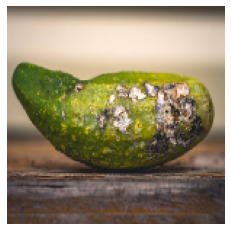

[[0. 0. 0. 0. 0. 1. 0. 0.]]
RottenCucumber
30/30 [==============================] - 8s 259ms/step - loss: 0.3003 - accuracy: 0.9413


In [27]:
 import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Menentukan path gambar
path = "C:/Users/Matematika/Downloads/rottencucumber1.jpg" # Ganti dengan path gambar Anda

# Memuat gambar
img = image.load_img(path, target_size=(150, 150))

# Menampilkan gambar
plt.imshow(img)
plt.axis('off')
plt.show()

# Mengubah gambar menjadi array numpy
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])

# Melakukan prediksi menggunakan model
classes = model.predict(images, batch_size=32)
print(classes)

# Mencetak hasil prediksi
if classes[0, 0] == 1:
    print('FreshCarrot')
elif classes[0, 1] == 1:
    print('FreshCucumber')
elif classes[0, 2] == 1:
    print('FreshPotato')
elif classes[0, 3] == 1:
    print('FreshTomato')
elif classes[0, 4] == 1:
    print('RottenCarrot')
elif classes[0, 5] == 1:
    print('RottenCucumber')
elif classes[0, 6] == 1:
    print('RottenPotato')
elif classes[0, 7] == 1:
    print('RottenTomato')
else:
    print('Tidak diketahui')
loss=model.evaluate(validation_generator,steps=len(validation_generator))

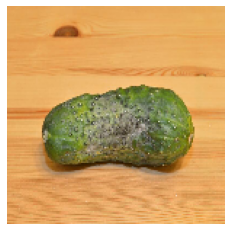

[[0. 0. 0. 0. 0. 1. 0. 0.]]
RottenCucumber
30/30 [==============================] - 8s 253ms/step - loss: 0.2970 - accuracy: 0.9486


In [28]:
 import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Menentukan path gambar
path = "C:/Users/Matematika/Downloads/rottencucumber2.jpg" # Ganti dengan path gambar Anda

# Memuat gambar
img = image.load_img(path, target_size=(150, 150))

# Menampilkan gambar
plt.imshow(img)
plt.axis('off')
plt.show()

# Mengubah gambar menjadi array numpy
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])

# Melakukan prediksi menggunakan model
classes = model.predict(images, batch_size=32)
print(classes)

# Mencetak hasil prediksi
if classes[0, 0] == 1:
    print('FreshCarrot')
elif classes[0, 1] == 1:
    print('FreshCucumber')
elif classes[0, 2] == 1:
    print('FreshPotato')
elif classes[0, 3] == 1:
    print('FreshTomato')
elif classes[0, 4] == 1:
    print('RottenCarrot')
elif classes[0, 5] == 1:
    print('RottenCucumber')
elif classes[0, 6] == 1:
    print('RottenPotato')
elif classes[0, 7] == 1:
    print('RottenTomato')
else:
    print('Tidak diketahui')
loss=model.evaluate(validation_generator,steps=len(validation_generator))

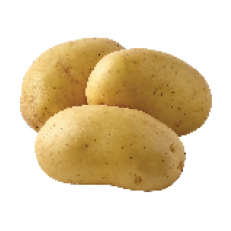

[[0. 0. 1. 0. 0. 0. 0. 0.]]
FreshPotato
30/30 [==============================] - 8s 261ms/step - loss: 0.2683 - accuracy: 0.9465


In [29]:
 import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Menentukan path gambar
path = "C:/Users/Matematika/Downloads/freshpotato2.jfif" # Ganti dengan path gambar Anda

# Memuat gambar
img = image.load_img(path, target_size=(150, 150))

# Menampilkan gambar
plt.imshow(img)
plt.axis('off')
plt.show()

# Mengubah gambar menjadi array numpy
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])

# Melakukan prediksi menggunakan model
classes = model.predict(images, batch_size=32)
print(classes)

# Mencetak hasil prediksi
if classes[0, 0] == 1:
    print('FreshCarrot')
elif classes[0, 1] == 1:
    print('FreshCucumber')
elif classes[0, 2] == 1:
    print('FreshPotato')
elif classes[0, 3] == 1:
    print('FreshTomato')
elif classes[0, 4] == 1:
    print('RottenCarrot')
elif classes[0, 5] == 1:
    print('RottenCucumber')
elif classes[0, 6] == 1:
    print('RottenPotato')
elif classes[0, 7] == 1:
    print('RottenTomato')
else:
    print('Tidak diketahui')
loss=model.evaluate(validation_generator,steps=len(validation_generator))

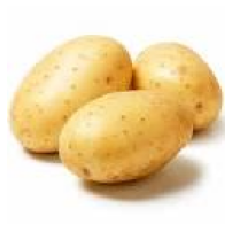

[[0. 0. 1. 0. 0. 0. 0. 0.]]
FreshPotato
30/30 [==============================] - 8s 260ms/step - loss: 0.3377 - accuracy: 0.9392


In [30]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Menentukan path gambar
path = "C:/Users/Matematika/Downloads/freshpotato.jpg" # Ganti dengan path gambar Anda

# Memuat gambar
img = image.load_img(path, target_size=(150, 150))

# Menampilkan gambar
plt.imshow(img)
plt.axis('off')
plt.show()

# Mengubah gambar menjadi array numpy
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])

# Melakukan prediksi menggunakan model
classes = model.predict(images, batch_size=32)
print(classes)

# Mencetak hasil prediksi
if classes[0, 0] == 1:
    print('FreshCarrot')
elif classes[0, 1] == 1:
    print('FreshCucumber')
elif classes[0, 2] == 1:
    print('FreshPotato')
elif classes[0, 3] == 1:
    print('FreshTomato')
elif classes[0, 4] == 1:
    print('RottenCarrot')
elif classes[0, 5] == 1:
    print('RottenCucumber')
elif classes[0, 6] == 1:
    print('RottenPotato')
elif classes[0, 7] == 1:
    print('RottenTomato')
else:
    print('Tidak diketahui')
loss=model.evaluate(validation_generator,steps=len(validation_generator))

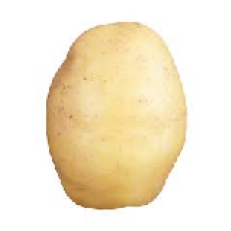

[[0. 0. 1. 0. 0. 0. 0. 0.]]
FreshPotato
30/30 [==============================] - 8s 252ms/step - loss: 0.3363 - accuracy: 0.9465


In [31]:
 import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Menentukan path gambar
path = "C:/Users/Matematika/Downloads/freshpotato3.jfif" # Ganti dengan path gambar Anda

# Memuat gambar
img = image.load_img(path, target_size=(150, 150))

# Menampilkan gambar
plt.imshow(img)
plt.axis('off')
plt.show()

# Mengubah gambar menjadi array numpy
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])

# Melakukan prediksi menggunakan model
classes = model.predict(images, batch_size=32)
print(classes)

# Mencetak hasil prediksi
if classes[0, 0] == 1:
    print('FreshCarrot')
elif classes[0, 1] == 1:
    print('FreshCucumber')
elif classes[0, 2] == 1:
    print('FreshPotato')
elif classes[0, 3] == 1:
    print('FreshTomato')
elif classes[0, 4] == 1:
    print('RottenCarrot')
elif classes[0, 5] == 1:
    print('RottenCucumber')
elif classes[0, 6] == 1:
    print('RottenPotato')
elif classes[0, 7] == 1:
    print('RottenTomato')
else:
    print('Tidak diketahui')
loss=model.evaluate(validation_generator,steps=len(validation_generator))

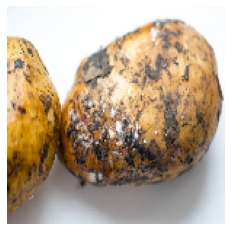

[[0. 0. 0. 0. 0. 0. 1. 0.]]
RottenPotato
30/30 [==============================] - 8s 260ms/step - loss: 0.3174 - accuracy: 0.9465


In [32]:
 import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Menentukan path gambar
path = "C:/Users/Matematika/Downloads/rottenpotato1.jpg" # Ganti dengan path gambar Anda

# Memuat gambar
img = image.load_img(path, target_size=(150, 150))

# Menampilkan gambar
plt.imshow(img)
plt.axis('off')
plt.show()

# Mengubah gambar menjadi array numpy
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])

# Melakukan prediksi menggunakan model
classes = model.predict(images, batch_size=10)
print(classes)

# Mencetak hasil prediksi
if classes[0, 0] == 1:
    print('FreshCarrot')
elif classes[0, 1] == 1:
    print('FreshCucumber')
elif classes[0, 2] == 1:
    print('FreshPotato')
elif classes[0, 3] == 1:
    print('FreshTomato')
elif classes[0, 4] == 1:
    print('RottenCarrot')
elif classes[0, 5] == 1:
    print('RottenCucumber')
elif classes[0, 6] == 1:
    print('RottenPotato')
elif classes[0, 7] == 1:
    print('RottenTomato')
else:
    print('Tidak diketahui')
loss=model.evaluate(validation_generator,steps=len(validation_generator))

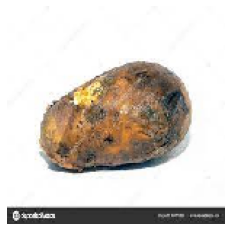

[[0. 0. 0. 0. 0. 0. 1. 0.]]
RottenPotato
30/30 [==============================] - 8s 256ms/step - loss: 0.3453 - accuracy: 0.9434


In [33]:
 import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Menentukan path gambar
path = "C:/Users/Matematika/Downloads/rottenpotato2.jfif" # Ganti dengan path gambar Anda

# Memuat gambar
img = image.load_img(path, target_size=(150, 150))

# Menampilkan gambar
plt.imshow(img)
plt.axis('off')
plt.show()

# Mengubah gambar menjadi array numpy
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])

# Melakukan prediksi menggunakan model
classes = model.predict(images, batch_size=32)
print(classes)

# Mencetak hasil prediksi
if classes[0, 0] == 1:
    print('FreshCarrot')
elif classes[0, 1] == 1:
    print('FreshCucumber')
elif classes[0, 2] == 1:
    print('FreshPotato')
elif classes[0, 3] == 1:
    print('FreshTomato')
elif classes[0, 4] == 1:
    print('RottenCarrot')
elif classes[0, 5] == 1:
    print('RottenCucumber')
elif classes[0, 6] == 1:
    print('RottenPotato')
elif classes[0, 7] == 1:
    print('RottenTomato')
else:
    print('Tidak diketahui')
loss=model.evaluate(validation_generator,steps=len(validation_generator))

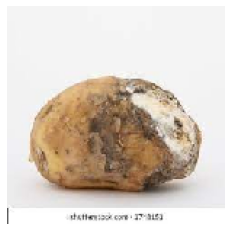

[[0. 0. 0. 0. 0. 0. 1. 0.]]
RottenPotato
30/30 [==============================] - 8s 257ms/step - loss: 0.3546 - accuracy: 0.9298


In [34]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Menentukan path gambar
path = "C:/Users/Matematika/Downloads/rotten potato.jpg" # Ganti dengan path gambar Anda

# Memuat gambar
img = image.load_img(path, target_size=(150, 150))

# Menampilkan gambar
plt.imshow(img)
plt.axis('off')
plt.show()

# Mengubah gambar menjadi array numpy
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])

# Melakukan prediksi menggunakan model
classes = model.predict(images, batch_size=32)
print(classes)

# Mencetak hasil prediksi
if classes[0, 0] == 1:
    print('FreshCarrot')
elif classes[0, 1] == 1:
    print('FreshCucumber')
elif classes[0, 2] == 1:
    print('FreshPotato')
elif classes[0, 3] == 1:
    print('FreshTomato')
elif classes[0, 4] == 1:
    print('RottenCarrot')
elif classes[0, 5] == 1:
    print('RottenCucumber')
elif classes[0, 6] == 1:
    print('RottenPotato')
elif classes[0, 7] == 1:
    print('RottenTomato')
else:
    print('Tidak diketahui')
loss=model.evaluate(validation_generator,steps=len(validation_generator))

In [35]:
from tensorflow.keras.preprocessing import image

model.save('D:Vegetables/vegetablesmodel.h5')

In [36]:
from tensorflow.keras.preprocessing import image

model.save('D:Vegetables/vegetablesmodel.pb')

INFO:tensorflow:Assets written to: D:Vegetables/vegetablesmodel.pb\assets
